In [1]:
# ! Followed tutorial("https://www.youtube.com/watch?v=TF2Nx_ifmrU")

import yfinance as yf
import os
import pandas as pd

In [2]:
# * Get historical data & clean
ticker = yf.Ticker("SPY")

In [3]:
historical_data = ticker.history(period="max")

In [4]:
historical_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1993-01-29 00:00:00-05:00,25.047169,25.047169,24.922556,25.029367,1003200,0.0,0.0,0.0
1993-02-01 00:00:00-05:00,25.047171,25.207388,25.047171,25.207388,480500,0.0,0.0,0.0
1993-02-02 00:00:00-05:00,25.189598,25.278607,25.136192,25.260805,201300,0.0,0.0,0.0
1993-02-03 00:00:00-05:00,25.296393,25.545619,25.278591,25.527817,529400,0.0,0.0,0.0
1993-02-04 00:00:00-05:00,25.616838,25.688045,25.332009,25.634640,531500,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-07-26 00:00:00-04:00,454.470001,456.989990,453.380005,455.510010,71052900,0.0,0.0,0.0
2023-07-27 00:00:00-04:00,459.019989,459.440002,451.549988,452.489990,92194400,0.0,0.0,0.0
2023-07-28 00:00:00-04:00,455.880005,457.779999,452.489990,456.920013,79949400,0.0,0.0,0.0


In [5]:
historical_data.index = pd.to_datetime(historical_data.index.tz_localize(None))

In [6]:
historical_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1993-01-29,25.047169,25.047169,24.922556,25.029367,1003200,0.0,0.0,0.0
1993-02-01,25.047171,25.207388,25.047171,25.207388,480500,0.0,0.0,0.0
1993-02-02,25.189598,25.278607,25.136192,25.260805,201300,0.0,0.0,0.0
1993-02-03,25.296393,25.545619,25.278591,25.527817,529400,0.0,0.0,0.0
1993-02-04,25.616838,25.688045,25.332009,25.634640,531500,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-07-26,454.470001,456.989990,453.380005,455.510010,71052900,0.0,0.0,0.0
2023-07-27,459.019989,459.440002,451.549988,452.489990,92194400,0.0,0.0,0.0
2023-07-28,455.880005,457.779999,452.489990,456.920013,79949400,0.0,0.0,0.0


In [7]:
del historical_data["Dividends"]
del historical_data["Stock Splits"]

In [8]:
historical_data.columns = [c.lower() for c in historical_data.columns]

<Axes: xlabel='Date'>

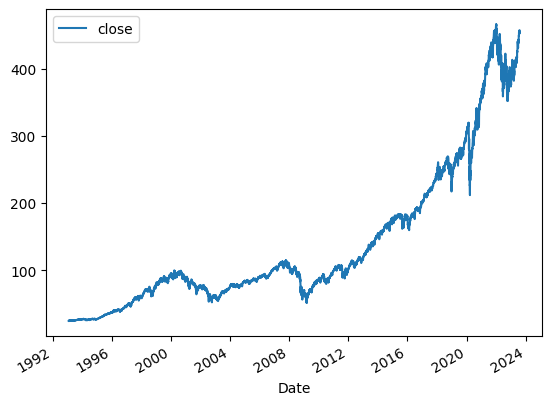

In [9]:
historical_data.plot.line(y="close", use_index=True)

In [12]:
# * Get Wikipedia edits & merge into historical dataframe
wiki = pd.read_csv("wikipedia_edits.csv",index_col=0, parse_dates=True)

In [13]:
wiki

,edit_count,sentiment,neg_sentiment
2006-07-11,0.0,0.122885,0.0
2006-07-12,0.0,0.096552,0.0
2006-07-13,0.0,0.096552,0.0
2006-07-14,0.0,0.096552,0.0
2006-07-15,0.0,0.096552,0.0
...,...,...,...
2023-07-28,0.0,0.000000,0.0
2023-07-29,0.0,0.000000,0.0
2023-07-30,0.0,0.000000,0.0
2023-07-31,0.0,0.000000,0.0


In [14]:
historical_data = historical_data.merge(wiki, left_index=True, right_index=True)

In [15]:
historical_data

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.033856,0.000000
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.033856,0.000000
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.031732,0.011111
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.031732,0.011111
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.031732,0.011111
...,...,...,...,...,...,...,...,...
2023-07-25,272.380005,272.899994,265.000000,265.279999,112757300,0.0,0.000000,0.000000
2023-07-26,263.250000,268.040009,261.750000,264.350006,95856200,0.0,0.000000,0.000000
2023-07-27,268.309998,269.130005,255.300003,255.710007,103697300,0.0,0.000000,0.000000
2023-07-28,259.859985,267.250000,258.230011,266.440002,111149300,0.0,0.000000,0.000000


In [16]:
# * Add predictors
# tomorrow
# target
# rolling
historical_data["tomorrow"] = historical_data["close"].shift(-1)

In [17]:
historical_data

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.033856,0.000000,1.588667
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.033856,0.000000,1.464000
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.031732,0.011111,1.280000
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.031732,0.011111,1.074000
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.031732,0.011111,1.053333
...,...,...,...,...,...,...,...,...,...
2023-07-25,272.380005,272.899994,265.000000,265.279999,112757300,0.0,0.000000,0.000000,264.350006
2023-07-26,263.250000,268.040009,261.750000,264.350006,95856200,0.0,0.000000,0.000000,255.710007
2023-07-27,268.309998,269.130005,255.300003,255.710007,103697300,0.0,0.000000,0.000000,266.440002
2023-07-28,259.859985,267.250000,258.230011,266.440002,111149300,0.0,0.000000,0.000000,267.429993


In [18]:
historical_data["target"] = (historical_data["tomorrow"] > historical_data["close"]).astype(int)

In [19]:
# * Verify up/down values for target are evenly distributed
historical_data["target"].value_counts()

target
1    1709
0    1585
Name: count, dtype: int64

In [20]:
# * Build prediction model
# Baseline model - Random Forest
from sklearn.ensemble import RandomForestClassifier
# n estimators in number of individual estimators we want to train
# min sample split is minimum number of samples before an individual decision tree will split its nodes
#     - higher number will result in lower performance on the training set, will result in less overfit
#     - lower number will result in higher performance on the trainin set, but will result in more overfit
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train_set = historical_data.iloc[:-200] # everything except last 200 days
test_set = historical_data[-200:] # last 200 days

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train_set[predictors], train_set["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [21]:
from sklearn.metrics import precision_score

predictions = model.predict(test_set[predictors])
predictions = pd.Series(predictions, index=test_set.index)
precision_score(test_set["target"], predictions)

0.5469613259668509

In [22]:
# * Backtest historical dataframe
# To get a better error estimation, we want to backtest
def predict(train_set, test_set, predictors, model):
    model.fit(train_set[predictors], train_set["target"])
    predictions = model.predict(test_set[predictors])
    predictions = pd.Series(predictions, index=test_set.index, name="predictions")
    combined = pd.concat([test_set["target"], predictions], axis=1)
    return combined

In [57]:
# Because we don't have historical data for early periods of the data frame, we need to skip about 3 years (1095 days)
# Want to generate new predictions about every 6 months (150 days)
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [58]:
# Upgrade the model to an XGBoost classifier
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(historical_data, model, predictors)

In [59]:
precision_score(predictions["target"], predictions["predictions"])

0.5111561866125761

In [60]:
# * Add more predictors
def compute_rolling(historical_data):
    horizons = [2, 7, 60, 365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = historical_data.rolling(horizon, min_periods=1).mean() # min_periods avoids NA valus by computing data for periods of 1

        ratio_column = f"close_ratio_{horizon}"
        historical_data[ratio_column] = historical_data["close"] / rolling_averages["close"]

        edit_column = f"edit_{horizon}"
        historical_data[edit_column] = rolling_averages["edit_count"]

        rolling = historical_data.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        historical_data[trend_column] = rolling["target"]

        new_predictors += [ratio_column, trend_column, edit_column]
    return historical_data, new_predictors

In [61]:
historical_data, new_predictors = compute_rolling(historical_data.copy())

In [62]:
historical_data

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.033856,0.000000,1.588667,0,...,NaN,1.000000,0.0,NaN,1.000000,0.0,NaN,1.000000,0.0,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.033856,0.000000,1.464000,0,...,0.0,0.998743,0.0,0.000000,0.998743,0.0,0.000000,0.998743,0.0,0.000000
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.031732,0.011111,1.280000,0,...,0.0,0.945465,0.0,0.000000,0.945465,0.0,0.000000,0.945465,0.0,0.000000
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.031732,0.011111,1.074000,0,...,0.0,0.864086,0.0,0.000000,0.864086,0.0,0.000000,0.864086,0.0,0.000000
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.031732,0.011111,1.053333,0,...,0.0,0.767216,0.0,0.000000,0.767216,0.0,0.000000,0.767216,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,272.380005,272.899994,265.000000,265.279999,112757300,0.0,0.000000,0.000000,264.350006,0,...,0.5,0.961040,0.0,0.428571,1.168980,0.0,0.666667,1.137745,0.0,0.531507
2023-07-26,263.250000,268.040009,261.750000,264.350006,95856200,0.0,0.000000,0.000000,255.710007,0,...,0.0,0.970748,0.0,0.285714,1.156386,0.0,0.650000,1.134374,0.0,0.528767
2023-07-27,268.309998,269.130005,255.300003,255.710007,103697300,0.0,0.000000,0.000000,266.440002,1,...,0.0,0.957931,0.0,0.142857,1.110986,0.0,0.650000,1.097889,0.0,0.528767
2023-07-28,259.859985,267.250000,258.230011,266.440002,111149300,0.0,0.000000,0.000000,267.429993,1,...,0.5,1.011563,0.0,0.285714,1.148777,0.0,0.666667,1.144231,0.0,0.531507


In [63]:
# * Backtest & Evaluate
predictions = backtest(historical_data, model, new_predictors)

In [64]:
precision_score(predictions["target"], predictions["predictions"])

0.5032258064516129

In [65]:
predictions

,target,predictions
2014-11-03,0,0
2014-11-04,0,1
2014-11-05,1,1
2014-11-06,0,1
2014-11-07,1,1
...,...,...
2023-07-25,0,1
2023-07-26,0,1
2023-07-27,1,1
2023-07-28,1,1


In [ ]:
# TODO: add predictor/s for sentiment from tweets, google trends, stock news
# TODO: add predictor/s for related stock tickers (e.g. $SPY, $TSLA, $QQQ, $APL)
# TODO: add predictor/s for cryptocurrency tickers (e.g. $DOGE-USD, $BTC-USD, $ETH-USD)